In [1]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
df_pk = pd.read_csv(os.path.join('data', 'PoliceKillingsUS.csv'), parse_dates=['date'], encoding='latin1')
df_population = pd.read_csv(os.path.join('data', 'citypopulation.csv'))
df_income = pd.read_csv(os.path.join('data', 'MedianHouseholdIncome2015.csv'), encoding='latin1')
df_poverty = pd.read_csv(os.path.join('data', 'PercentagePeopleBelowPovertyLevel.csv'), encoding='latin1')
df_educ = pd.read_csv(os.path.join('data', 'PercentOver25CompletedHighSchool.csv'), encoding='latin1')
df_race = pd.read_csv(os.path.join('data', 'ShareRaceByCity.csv'), encoding='latin1')

In [4]:
for df in [df_pk, df_population, df_income, df_poverty, df_educ, df_race]:
    df.columns = df.columns.str.lower()
    df.rename({'geographic area':'state'},axis=1, inplace=True)

In [5]:
df_pk.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [6]:
df_pk_city = df_pk.groupby(['state', 'city']).count()['id'].reset_index().rename({'id':'count'},axis=1)

In [7]:
df_pk_city.head()

,state,city,count
0,AK,Anchorage,3
1,AK,Barrow,1
2,AK,Big Lake,1
3,AK,Fairbanks,5
4,AK,Houston,1


In [8]:
df_population = df_population.drop(columns='state').rename({'name':'city', 'stname':'state'}, axis=1)
df_population['state'] = df_population['state'].replace(us_state_abbrev)

In [9]:
df_pop_agg = df_population.groupby(['state','city']).mean()['popestimate2015'].reset_index()

In [10]:
[i.shape for i in [df_poverty, df_income, df_educ, df_race, df_pop_agg]]

[(29329, 3), (29322, 3), (29329, 3), (29268, 7), (43959, 3)]

In [11]:
df_temp_1 = pd.merge(df_poverty, df_income, on=['state', 'city'], how='inner', validate='one_to_one').\
               merge(df_educ, on=['state', 'city'], how='inner', validate='one_to_one').\
               merge(df_race, on=['state', 'city'], how='inner', validate='one_to_one')

In [12]:
df_temp_1.shape

(29115, 10)

In [13]:
df_temp_1['city'] = df_temp_1['city'].str.lower().str.replace('city', '').str.replace('town', '').str.replace('cdp', '').str.strip()
df_pk_city['city'] = df_pk_city['city'].str.lower().str.replace('city', '').str.replace('town', '').str.replace('cdp', '').str.strip()

In [14]:
df_temp_1.shape

(29115, 10)

In [15]:
df_temp_1.groupby(['state', 'city']).count().shape

(29011, 8)

In [16]:
df_temp_1.head()

,state,city,poverty_rate,median income,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,abanda,78.8,11207,21.2,67.2,30.2,0,0,1.6
1,AL,abbeville,29.1,25615,69.1,54.4,41.4,0.1,1,3.1
2,AL,adamsville,25.5,42575,78.9,52.3,44.9,0.5,0.3,2.3
3,AL,addison,30.7,37083,81.4,99.1,0.1,0,0.1,0.4
4,AL,akron,42,21667,68.6,13.2,86.5,0,0,0.3


In [17]:
df_temp2 = pd.merge(df_pk_city, df_temp_1, on=['state', 'city'], how='inner')

In [18]:
df_population['city'] = df_population['city'].str.lower().str.replace('city', '').str.\
                            replace('town', '').str.replace('township', '').str.replace('village', '').str.replace('cdp', '').str.replace('(pt.)', '').str.strip()

/Users/martinpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [19]:
df_population = df_population.drop_duplicates(subset=['city', 'state'])

In [20]:
df_temp3 = pd.merge(df_population[['state', 'popestimate2016','city']], df_temp2, on=['state', 'city'], how='inner')

In [21]:
df = df_temp3.drop_duplicates().reset_index(drop=True)

In [22]:
#df.to_csv('joined.csv',index=False)

In [23]:
df["percent_victim"] = df["count"]/df["popestimate2016"]

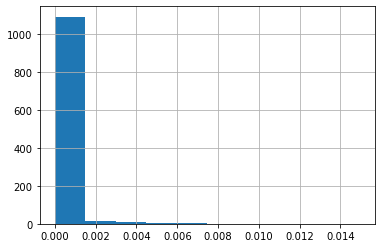

In [24]:
df["percent_victim"].hist();

In [25]:
df["percent_victim"].quantile(0.5)

4.18848167539267e-05

In [26]:
df['percent_victim_level'] = np.where(df['percent_victim'] > 5e-05, 1, 0)

In [27]:
drop_cols = ['popestimate2016', 'count', 'city', 'state', 'percent_victim', 'share_white']

In [28]:
df = df.drop(columns=drop_cols)

In [29]:
for col in list(df.select_dtypes('object').columns):
    df[col] = df[col].apply(lambda x: re.sub("[^0-9]", "", x)).replace('', np.nan)

In [30]:
df = df.dropna().astype(float)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('percent_victim_level', axis=1)
y = df['percent_victim_level']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=5)

## Model Development

### Quantum Model

In [33]:
df_train = pd.concat([X_train, y_train], axis=1)
df_valid = pd.concat([X_valid, y_valid], axis=1)

In [34]:
sample = True
if sample:
    df_train = df_train.sample(100)
    df_valid = df_valid.sample(20)

In [35]:
def qiskit_format(df):
    input_data = {0:df.query("percent_victim_level == 0").drop(columns='percent_victim_level').values,
                  1:df.query("percent_victim_level == 1").drop(columns='percent_victim_level').values}
    return input_data

In [36]:
input_train = qiskit_format(df_train)
input_test = qiskit_format(df_valid)

In [37]:
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit import IBMQ

In [57]:
nrows, feature_dim = df_train.shape
nrows, feature_dim

(100, 8)

In [39]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, input_train, input_test)

In [40]:
#provider = IBMQ.load_account()
#backend = provider.get_backend('ibmq_qasm_simulator')
#print(backend)

In [41]:
%%time
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=512, seed_simulator=36, seed_transpiler=36, wait=1)

result = qsvm.run(quantum_instance)

CPU times: user 7min 2s, sys: 10.9 s, total: 7min 13s
Wall time: 7min 42s


In [42]:
print(f'Testing success ratio: {result["testing_accuracy"]}')

Testing success ratio: 0.65


### Classical Computation Model

In [43]:
from xgboost import XGBClassifier

from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.inspection import plot_partial_dependence, partial_dependence

In [44]:
for col in list(df.select_dtypes('object').columns):
    df[col] = df[col].apply(lambda x: re.sub("[^0-9]", "", x)).replace('', np.nan)

In [45]:
df = df.dropna().astype(float)

In [46]:
X = df.drop('percent_victim_level', axis=1)
y = df['percent_victim_level']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=5)

In [47]:
mod_logit = LogisticRegression(max_iter=500, random_state=36)
mod_logit.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=36)

In [48]:
mod_rf = RandomForestClassifier(random_state=36)
mod_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=36)

In [49]:
mod_hgb = HistGradientBoostingClassifier(random_state=36)
mod_hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=36)

In [50]:
mod_xgb = XGBClassifier(objective='binary:logistic')
mod_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Model Explanation and Evaluation

In [51]:
y_valid.value_counts()

0.0    114
1.0    110
Name: percent_victim_level, dtype: int64

In [52]:
def get_acc(mod, X=X_valid, y=y_valid):
    y_pred = mod.predict(X)
    return accuracy_score(y.values, y_pred)

In [53]:
acc = [get_acc(i) for i in [mod_logit, mod_rf, mod_hgb, mod_xgb]]
model = ['logistic', 'random forest', 'histgradient boosting', 'xgboost']
pd.DataFrame({'model':model, 'accuracy': acc})

,model,accuracy
0,logistic,0.714286
1,random forest,0.767857
2,histgradient boosting,0.754464
3,xgboost,0.741071


In [54]:
pd.DataFrame({'columns':list(X_train.columns),'importance':mod_rf.feature_importances_}).sort_values('importance', ascending=False, ignore_index=True)

,columns,importance
0,share_asian,0.257936
1,share_hispanic,0.185538
2,median income,0.137196
3,share_black,0.124724
4,percent_completed_hs,0.110980
5,poverty_rate,0.108360
6,share_native_american,0.075268


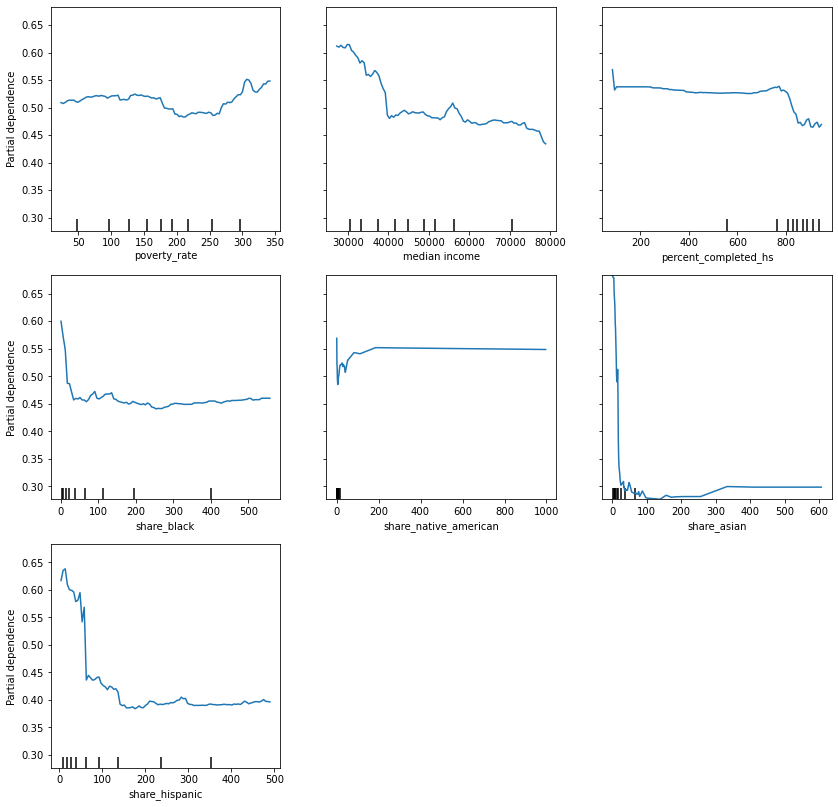

In [55]:
fig, ax = plt.subplots(figsize=(14, 14))
plot_partial_dependence(mod_rf, X_valid, features=[*range(7)], ax=ax)
plt.show()